In [ ]:
""""
This is a project coded by Fady Boktor.

The idea is to create Sierpinski's Triangle using randomness.

The concept is simple:

1- we plot an equilateral triangle
2- we plot a random dot inside the triangle
3- we choose randomly one of the Vertices, then plot another dot in the middle of
the distance between it and the random dot
4- we re-apply step 3 to the new dot
5- we repeat step 4 infinitely
"""

'"\nThis is a project coded by Fady Boktor.\nThe idea is to create Sierpinski\'s Triangle using randomness.\nThe concept is simple:\n1- we plot an equilateral triangle\n2- we plot a random dot inside the triangle\n3- we choose randomly one of the Vertices, then plot another dot in the middle of the distance between it and the random dot\n4- we re-apply step 3 to the new dot\n5- we repeat step 4 infinitelly\n'

Importing libraries

In [1]:
import matplotlib.pyplot as plt     # For plotting
import numpy as np                  # For math

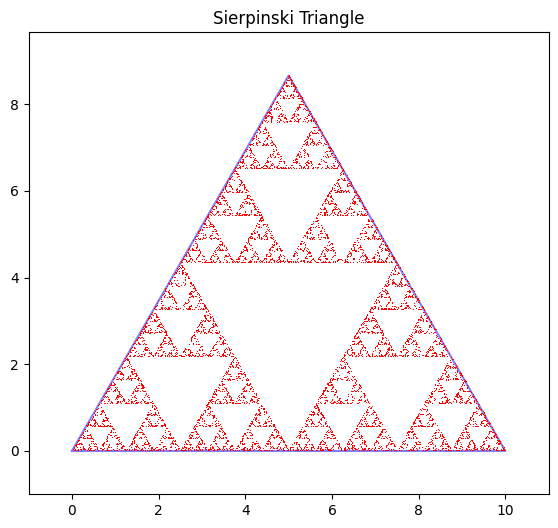

In [ ]:
# drawing The tequilateral triangle

# Define the side length of the equilateral triangle
side_length = 10

# Calculate the coordinates of the vertices
# Vertex 1 (bottom-left)
x1, y1 = 0, 0
# Vertex 2 (bottom-right)
x2, y2 = side_length, 0
# Vertex 3 (top)
# The height of an equilateral triangle is (sqrt(3)/2) * side_length
# The x-coordinate of the top vertex is half the side length
x3, y3 = side_length / 2, (np.sqrt(3) / 2) * side_length

# Create arrays for x and y coordinates, closing the triangle by repeating the first point
x_coords = [x1, x2, x3, x1]
y_coords = [y1, y2, y3, y1]





# Creating the random dots inside the triangle

"""
Approach:

Barycentric Coordinates: I will use barycentric coordinates to represent any
point inside the triangle as a weighted sum of its vertices.
"""

# Set the random seed for reproducibility
np.random.seed(42)

# Define the triangle vertices (as 2D points)
A = np.array([x1, y1])
B = np.array([x2, y2])
C = np.array([x3, y3])

# Generate two random numbers
r1, r2 = np.random.rand(2)

# Adjust if the point is outside the triangle (r1 + r2 > 1)
if r1 + r2 > 1:
    r1 = 1 - r1
    r2 = 1 - r2

# Calculate the random point using barycentric coordinates
current_point = A + r1 * (B - A) + r2 * (C - A)

# Number of points to generate (including the initial point)
num_points = 10000

# Array to store all points (initial point + generated points)
points = np.zeros((num_points, 2))
points[0] = current_point

# Generate fractal points using chaos game method
vertices = np.array([A, B, C])
for i in range(1, num_points):
    # Randomly select one vertex
    chosen_vertex = vertices[np.random.choice([0, 1, 2])]
    # Calculate midpoint between current point and chosen vertex
    current_point = (current_point + chosen_vertex) / 2
    points[i] = current_point





# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
# Plot triangle outline
ax.plot(x_coords, y_coords, 'b-', alpha=0.5)
# Plot all points as tiny dots
ax.plot(points[:, 0], points[:, 1], 'r,', markersize=0.5)  # Comma for tiny dots

# Set plot limits and aspect ratio
plt.xlim(-1, side_length + 1)
plt.ylim(-1, (np.sqrt(3) / 2) * side_length + 1)
plt.gca().set_aspect('equal')
plt.title("Sierpinski Triangle")
plt.grid(False)
plt.show()